## Lecture 6 - Introduktion till deep learning-ramverk
**Assignment: Tensors and a tiny neural network** 

Instructions:

- Choose PyTorch or Keras
- Keep the model small and run quickly
- Explain what each block does

## Task 1: Tensor operations
Create and manipulate tensors to understand shapes and broadcasting.

In [1]:
# TODO: Create a tensor with shape (2, 3)
import torch

tensor = torch.randn(2, 3)
print("Tensor shape:", tensor.shape)
print(tensor)

Tensor shape: torch.Size([2, 3])
tensor([[-0.4033, -0.4663,  0.8899],
        [-0.1191,  0.0635, -0.1932]])


In [2]:
# TODO: Reshape to (3, 2)
reshaped_tensor = tensor.reshape(3,2)
print('Reshaped tensor shape:', reshaped_tensor.shape)
print(reshaped_tensor)

Reshaped tensor shape: torch.Size([3, 2])
tensor([[-0.4033, -0.4663],
        [ 0.8899, -0.1191],
        [ 0.0635, -0.1932]])


In [3]:
# TODO: Demonstrate broadcasting with another tensor
other_tensor = torch.ones(2)  # Shape (2,)
print("Other tensor:", other_tensor)
broadcasted_sum = reshaped_tensor + other_tensor  # Broadcasts other_tensor to shape (3, 2)
print("Broadcasted sum shape:", broadcasted_sum.shape)
print(broadcasted_sum)

Other tensor: tensor([1., 1.])
Broadcasted sum shape: torch.Size([3, 2])
tensor([[0.5967, 0.5337],
        [1.8899, 0.8809],
        [1.0635, 0.8068]])


## Task 2: Build a tiny neural network

Keep the model small and runnable.


In [4]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: cuda


In [5]:
# TODO: Use MNIST or iris (flattened)

from torchvision import datasets, transforms

# The transformation below makes the data take the form we want.
# This is optional and can be done later.
# For all datasets, there are good ways to normalize. BUT, we may need
# to find the mean and standard deviation ourselves.
# For well-known datasets, you can often find these values together with the data.
# 0.1307 is the mean, 0.3081 is the std for MNIST.
# We normalize so that the weights actually have an impact on the result.
# READ MORE: (Vanishing and exploding gradients)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Below, we first load the training data, then the test data.
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

In [6]:
train_data.data[0].float()


tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,

In [7]:
import pandas as pd

# Make the trainig data into a dataframe, and show the first few rows
df = pd.DataFrame(train_data.data.tolist())
print(df.head())

                                                  0   \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                  1   \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                  2   \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [8]:
# Flatten 28x28 -> 784, and stack into tensors

# Our data consists of images. The images are 28x28 pixels in size.
# Our neural network wants the data in vector form.
# THEREFORE: we need to flatten the images.
# We turn them into a 784x1 sized vector instead.
# One row per pixel


# We also divide the values by 255 to scale the maximum value down to 1.
X_train = train_data.data.float() / 255.0
y_train = train_data.targets
X_test = test_data.data.float() / 255.0
y_test = test_data.targets

# Normalize (optional, often helps)
X_train = (X_train - 0.1307) / 0.3081
X_test = (X_test - 0.1307) / 0.3081

X_train_flat = X_train.reshape(X_train.size(0), -1)  # (60000, 784)
X_test_flat = X_test.reshape(X_test.size(0), -1)     # (10000, 784)

# Move data to device (model will be moved below)
X_train_flat = X_train_flat.to(device)
y_train = y_train.to(device)
X_test_flat = X_test_flat.to(device)
y_test = y_test.to(device)

In [9]:
X_train.shape

torch.Size([60000, 28, 28])

In [10]:
X_test.shape

torch.Size([10000, 28, 28])

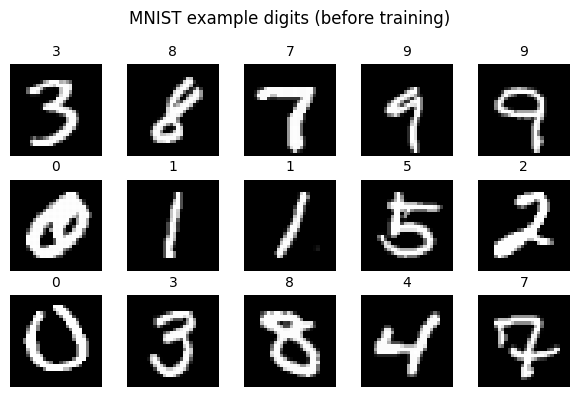

In [16]:
# Bonus: Plot a few images for visualization.
import matplotlib.pyplot as plt

# ----- Visualization BEFORE: example digits from MNIST -----
fig, axes = plt.subplots(3, 5, figsize=(6, 4))
for i, ax in enumerate(axes.flat):
    img = train_data.data[i+10000].tolist()  # .tolist() avoids NumPy 2.x / PyTorch interop issues
    ax.imshow(img, cmap="gray")
    ax.set_title(str(train_data.targets[i+10000].item()), fontsize=10)
    ax.axis("off")
plt.suptitle("MNIST example digits (before training)", fontsize=12)
plt.tight_layout()


In [17]:
# TODO: Build a model with:
# - 1 hidden layer (ReLU)
# - output layer (softmax or sigmoid)

# nn means Neural Network
import torch.nn as nn

# We create an empty model.

# We choose the size of the hidden layers ourselves!
# It is typical to use a power of 2, that is, 2 raised to some power
# (2, 4, 8, 16, 32, 64, 128, ...)

# Our input and output sizes are defined by our problem.
# The input size is exactly the same as our input data (the number of features).
# The output size is exactly equal to the number of classes we want to predict.
input_size = 784
output_size = 10

model = nn.Sequential(
    nn.Linear(input_size, 128),
    nn.ReLU(), # ReLU is an activation function that enables the model to learn complex relationships in the data.
    nn.Linear(128, output_size)
).to(device) # We move the model to the device.

In [18]:
# TODO: Train for a few epochs and print accuracy
import torch.optim as optim
# Training loop with train and test loss recording
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 10
batch_size = 64
train_losses = []
test_losses = []

# TODO: Train for a few epochs and print accuracy
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    perm = torch.randperm(X_train_flat.size(0), device=device)
    for start in range(0, X_train_flat.size(0), batch_size):
        end = start + batch_size
        batch_x = X_train_flat[perm[start:end]]
        batch_y = y_train[perm[start:end]]
        logits = model(batch_x)
        loss = criterion(logits, batch_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_train_loss = epoch_loss / (X_train_flat.size(0) // batch_size)
    train_losses.append(avg_train_loss)

    model.eval()
    with torch.no_grad():
        test_logits = model(X_test_flat)
        test_loss = criterion(test_logits, y_test).item()
    test_losses.append(test_loss)
    if (epoch + 1) % 2 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, train loss: {avg_train_loss:.4f}, test loss: {test_loss:.4f}")

model.eval()
with torch.no_grad():
    logits = model(X_test_flat)
    preds = torch.argmax(logits, dim=1)
    acc = (preds == y_test).float().mean().item()

print(f"Test accuracy: {acc:.4f}")

Epoch 2/10, train loss: 0.1170, test loss: 0.1128
Epoch 4/10, train loss: 0.0628, test loss: 0.0831
Epoch 6/10, train loss: 0.0400, test loss: 0.0861
Epoch 8/10, train loss: 0.0267, test loss: 0.0789
Epoch 10/10, train loss: 0.0182, test loss: 0.0932
Test accuracy: 0.9780


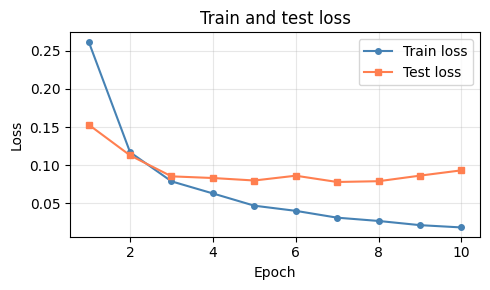

In [19]:
# BONUS: Plot training and test loss over epochs

fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(range(1, epochs + 1), train_losses, "o-", color="steelblue", markersize=4, label="Train loss")
ax.plot(range(1, epochs + 1), test_losses, "s-", color="coral", markersize=4, label="Test loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Train and test loss")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [21]:
# ----- Visualization AFTER: predicted vs actual (mix of correct and wrong) -----
import numpy as np
preds_cpu = preds.cpu()
y_test_cpu = y_test.cpu()
correct_mask = np.array((preds_cpu == y_test_cpu).tolist())
correct_idx = np.where(correct_mask)[0]
wrong_idx = np.where(~correct_mask)[0]
n_show = 10
n_wrong = min(5, len(wrong_idx))
n_correct = n_show - n_wrong
# Show n_correct correct predictions, then n_wrong wrong ones (if any); pad with correct if few wrong
indices_to_show = list(correct_idx[:n_correct]) + list(wrong_idx[:n_wrong])
if len(indices_to_show) < n_show:
    extra = n_show - len(indices_to_show)
    indices_to_show.extend(correct_idx[n_correct : n_correct + extra])

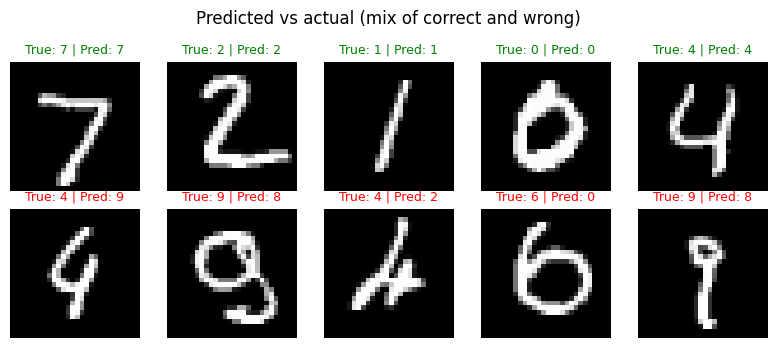

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(8, 3.5))
for i, ax in enumerate(axes.flat):
    idx = indices_to_show[i]
    img = test_data.data[idx].tolist()
    ax.imshow(img, cmap="gray")
    true_lbl = y_test_cpu[idx].item()
    pred_lbl = preds_cpu[idx].item()
    color = "green" if true_lbl == pred_lbl else "red"
    ax.set_title(f"True: {true_lbl} | Pred: {pred_lbl}", fontsize=9, color=color)
    ax.axis("off")
plt.suptitle("Predicted vs actual (mix of correct and wrong)", fontsize=12)
plt.tight_layout()

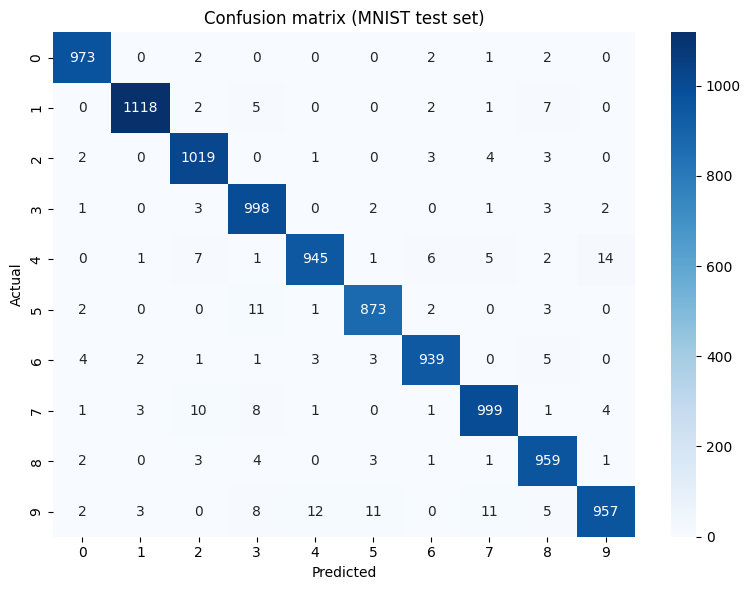

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# ----- Visualization AFTER: confusion matrix -----
# preds already holds all test predictions
cm = confusion_matrix(y_test_cpu.tolist(), preds_cpu.tolist())
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax, xticklabels=range(10), yticklabels=range(10))
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion matrix (MNIST test set)")
plt.tight_layout()
plt.savefig("../Assignments/data/MNIST/raw/L6_confusion_matrix.png", dpi=120, bbox_inches="tight")
plt.show()